# 1. Library & Input data

In [118]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from datetime import datetime
from unidecode import unidecode
from itertools import combinations

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import category_encoders as ce

import re
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn import preprocessing

/kaggle/input/new-feature/temp_features_extraction_0002am_6_9_2020.csv
/kaggle/input/new-feature/arpu_test_feature_raw_ver_3.csv
/kaggle/input/new-feature/arpu_train_feature_raw_ver_3.csv
/kaggle/input/new-feature/recharge_features_extraction_0055am_03092020.csv
/kaggle/input/new-feature/loan_features_extraction_06092020_ver3.csv
/kaggle/input/test-and-merge-all-file/arpu_test.csv
/kaggle/input/test-and-merge-all-file/test_submission.csv
/kaggle/input/test-and-merge-all-file/merge_all_file.csv
/kaggle/input/data-merge/test_data.csv
/kaggle/input/data-merge/train_data.csv


In [119]:
# train = pd.read_csv('../input/data-handle/data_train_encoder.csv')
# test = pd.read_csv('../input/data-handle/data_test_encoder.csv')
# f2_train = pd.read_csv('../input/data-handle/data_train_encoder.csv')
# df2_test = pd.read_csv('../input/data-handle/data_test_encoder.csv')
# df_train = pd.read_csv('../input/test-and-merge-all-file/merge_all_file.csv')
# df_test  = pd.read_csv('../input/test-and-merge-all-file/arpu_test.csv')
# test_submission = pd.read_csv('../input/test-and-merge-all-file/test_submission.csv')
test_submission  = pd.read_csv('../input/test-and-merge-all-file/test_submission.csv')
arpu_train = pd.read_csv('../input/data-merge/train_data.csv')
arpu_test  = pd.read_csv('../input/data-merge/test_data.csv')



new_test = pd.read_csv('../input/new-feature/arpu_test_feature_raw_ver_3.csv')
new_train = pd.read_csv('../input/new-feature/arpu_train_feature_raw_ver_3.csv')
new_recharge = pd.read_csv('../input/new-feature/recharge_features_extraction_0055am_03092020.csv')
new_temp = pd.read_csv('../input/new-feature/temp_features_extraction_0002am_6_9_2020.csv')


###  Encode columns

In [120]:
new_test

,msisdn,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,...,COL_27c,COL_27d,COL_16_F,COL_16_M,COL_17_year,COL_18_year,COL_17_month_year,COL_18_month_year,COL_17_upto_2019_10,COL_18_upto_2019_10
0,0001000cf619c9b3085d,23.0,"(22.0, 25.0]",COL_15_0,1.406352e+12,1.528529e+12,1325.000000,1166.000000,0.0,159.0,...,1251.151433,4.210,1,0,2014.0,2018.0,2014-07,2018-06,63.0,16.0
1,000100248d878d4558b2,45.0,"(40.0, 45.0]",COL_15_2,1.354547e+12,1.435043e+12,98020.542969,92391.042969,0.0,4579.5,...,14339.615263,25448.440,0,1,2012.0,2015.0,2012-12,2015-06,82.0,52.0
2,000100362c217ed2e556,NaN,NaN,NaN,NaN,NaN,17812.250000,13587.250000,0.0,3500.0,...,9805.962780,7993.485,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,000100645e3a4bd29c68,56.0,"(45.0, 60.0]",COL_15_1,1.258217e+12,1.527497e+12,144733.160156,66502.166016,0.0,78131.0,...,58294.091975,31636.050,0,1,2009.0,2018.0,2009-11,2018-05,119.0,17.0
4,00010073f9bc66ef77d3,37.0,"(30.0, 40.0]",COL_15_1,1.428636e+12,1.428636e+12,224438.242188,NaN,NaN,NaN,...,NaN,NaN,1,0,2015.0,2015.0,2015-04,2015-04,54.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,34.0,"(30.0, 40.0]",COL_15_1,1.501781e+12,1.507110e+12,292436.093750,37051.090820,0.0,101485.0,...,23502.813625,26260.420,1,0,2017.0,2017.0,2017-08,2017-10,26.0,24.0
57409,0001e646841a1a424e9a,40.0,"(30.0, 40.0]",COL_15_1,1.383903e+12,1.456716e+12,38074.214371,2474.215103,0.0,0.0,...,7948.727444,5125.130,0,1,2013.0,2016.0,2013-11,2016-02,71.0,44.0
57410,0001ead2f3d27418edf0,28.0,"(25.0, 30.0]",COL_15_0,1.452590e+12,1.460363e+12,14021.950195,2750.449951,0.0,1271.5,...,1760.659777,25.930,0,1,2016.0,2016.0,2016-01,2016-04,45.0,42.0
57411,0001ede64d1753c7cceb,19.0,"(18.0, 22.0]",COL_15_0,1.505191e+12,1.505191e+12,59704.500000,15904.500000,0.0,750.0,...,6703.372331,10747.710,0,1,2017.0,2017.0,2017-09,2017-09,25.0,25.0


In [121]:
new_train

,msisdn,label,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,...,COL_27c,COL_27d,COL_16_F,COL_16_M,COL_17_year,COL_18_year,COL_17_month_year,COL_18_month_year,COL_17_upto_2019_10,COL_18_upto_2019_10
0,00010016bb53e8e3c82e,0,54.0,"(45.0, 60.0]",COL_15_1,1.509112e+12,1.356869e+12,90909.093750,NaN,NaN,...,NaN,NaN,0,1,2017.0,2012.0,2017-10,2012-12,24.0,82.0
1,0001007187b4881379a9,0,45.0,"(40.0, 45.0]",COL_15_1,1.164515e+12,1.456715e+12,28211.099609,6296.094971,0.0,...,11411.651071,23047.690,0,1,2006.0,2016.0,2006-11,2016-02,155.0,44.0
2,000100829f9d67fff3cc,1,52.0,"(45.0, 60.0]",COL_15_1,1.326463e+12,1.332176e+12,219060.570312,45312.064453,0.0,...,25150.943504,30748.625,0,1,2012.0,2012.0,2012-01,2012-03,93.0,91.0
3,000100a5e09da7ad6649,0,NaN,NaN,NaN,NaN,NaN,125431.250000,106981.250000,0.0,...,19134.960835,34260.940,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,000100d7f3d9e70f62b0,0,NaN,NaN,NaN,NaN,NaN,201915.429688,71909.789062,0.0,...,29537.371300,25494.170,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,20.0,"(18.0, 22.0]",COL_15_0,1.379082e+12,1.524477e+12,92051.750000,71188.750000,0.0,...,8199.252786,6967.220,0,1,2013.0,2018.0,2013-09,2018-04,73.0,18.0
57717,0001f99f298dd21ce8c5,1,49.0,"(45.0, 60.0]",COL_15_2,1.314359e+12,1.314724e+12,29721.750000,29169.750000,0.0,...,25503.159943,112436.420,1,0,2011.0,2011.0,2011-08,2011-08,98.0,98.0
57718,0001fa0c3d21c0d758ec,1,44.0,"(40.0, 45.0]",COL_15_1,1.589706e+12,1.523678e+12,11575.500000,1575.500000,0.0,...,2071.746170,14682.500,1,0,2020.0,2018.0,2020-05,2018-04,-7.0,18.0
57719,0001fc8336def40dff4b,1,NaN,NaN,NaN,NaN,NaN,203570.437500,153645.437500,0.0,...,14373.828965,14608.580,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
new_train = new_train.drop(columns=['COL_17_month_year','COL_18_month_year'])
new_test = new_test.drop(columns=['COL_17_month_year','COL_18_month_year'])

In [123]:
new_recharge

,msisdn,COL_30_C,COL_30_V,num_arise_in_month_COL_30_C,num_arise_in_month_COL_30_V,num_trans_arise_month_COL_30,num_week_arise_trans_C_V_COL_30,num_days_trans_arise_month_COL_30,sum_money_C_COL_31,sum_money_V_COL_31,sum_money_C_V_COL_31,num_services_COL_30,max_money_C_COL_31,max_money_V_COL_31,max_money_C_V_COL_31,recharge_num_null_rows,min_money_C_COL_31,min_money_V_COL_31,min_money_C_V_COL_31
0,000100000eb52d2a47e1,1,0,1,0,1,1,1.0,50000.0,0.0,50000.0,1,50000.0,0.0,50000.0,30.0,50000.0,0.0,50000.0
1,000100001be537fce5cf,1,0,1,0,1,1,1.0,100000.0,0.0,100000.0,1,100000.0,0.0,100000.0,30.0,100000.0,0.0,100000.0
2,00010000e34bc5fff815,0,1,0,2,2,2,2.0,0.0,70000.0,70000.0,1,0.0,50000.0,50000.0,29.0,0.0,20000.0,20000.0
3,000100016510e7ef1501,0,1,0,3,3,2,2.0,0.0,200000.0,200000.0,1,0.0,100000.0,100000.0,29.0,0.0,50000.0,50000.0
4,00010001ccdec3a66936,0,1,0,3,3,1,1.0,0.0,90000.0,90000.0,1,0.0,50000.0,50000.0,30.0,0.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115129,0001fffea32e0e44bff9,0,1,0,2,2,1,2.0,0.0,150000.0,150000.0,1,0.0,100000.0,100000.0,29.0,0.0,50000.0,50000.0
115130,0001ffff501a5473d949,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
115131,0001ffffe92102017b85,0,1,0,1,1,1,1.0,0.0,20000.0,20000.0,1,0.0,20000.0,20000.0,30.0,0.0,20000.0,20000.0
115132,1.21E+104,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0


In [124]:
train_temp = new_temp[new_temp.msisdn.isin(list(new_train.msisdn))]
test_temp = new_temp[new_temp.msisdn.isin(list(new_test.msisdn))]
train_temp

,msisdn,COL_11_month_mean,UPLOAD_DATA_month_mean,num_partner_contact_month,num_services,num_be_called_by_partner_contact_month,total_call_time_second_month,COL_12_1.0,COL_12_2.0,COL_12_3.0,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
4,00010001ccdec3a66936,2.548997e+06,8.019778e+07,43,3.0,0.0,17182.0,1,1,0,...,112.0,0.0,0.0,7383.0,4227.0,5572.0,0.0,4585.0,12597.0,0.0
5,00010001f75b326c462b,0.000000e+00,0.000000e+00,222,2.0,1.0,108567.0,1,1,0,...,629.0,25.0,0.0,29150.0,44188.0,33616.0,1613.0,63056.0,45511.0,0.0
6,00010002c39aab3e6491,0.000000e+00,0.000000e+00,21,2.0,0.0,9761.0,1,1,0,...,48.0,0.0,7.0,4359.0,3966.0,1436.0,0.0,6383.0,3378.0,0.0
11,00010003b88135c84b19,0.000000e+00,0.000000e+00,19,2.0,0.0,3619.0,1,1,0,...,18.0,0.0,19.0,1079.0,561.0,1979.0,0.0,2648.0,971.0,0.0
15,000100041b6340a69b59,6.563995e+05,8.862282e+06,35,3.0,0.0,3058.0,1,1,0,...,20.0,0.0,2.0,1969.0,508.0,581.0,0.0,1974.0,1084.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115121,0001fffb4dc20b314447,0.000000e+00,0.000000e+00,40,2.0,0.0,9437.0,1,1,0,...,109.0,0.0,4.0,2540.0,2095.0,4802.0,0.0,2962.0,6475.0,0.0
115124,0001fffbeab265bfd4a8,0.000000e+00,0.000000e+00,143,2.0,0.0,27319.0,1,0,1,...,417.0,0.0,1.0,13873.0,581.0,12865.0,0.0,19595.0,0.0,7724.0
115127,0001fffdda8d1a8609f6,0.000000e+00,0.000000e+00,36,3.0,0.0,4418.0,1,1,1,...,49.0,0.0,4.0,1734.0,383.0,2301.0,0.0,2310.0,191.0,1917.0
115130,0001ffff501a5473d949,1.671111e+01,1.746667e+01,16,4.0,0.0,1158.0,1,1,1,...,24.0,0.0,16.0,411.0,102.0,645.0,0.0,300.0,855.0,3.0


In [125]:
train_recharge = new_recharge[new_recharge.msisdn.isin(list(new_train.msisdn))]
test_recharge  = new_recharge[new_recharge.msisdn.isin(list(new_test.msisdn))]
train_recharge

,msisdn,COL_30_C,COL_30_V,num_arise_in_month_COL_30_C,num_arise_in_month_COL_30_V,num_trans_arise_month_COL_30,num_week_arise_trans_C_V_COL_30,num_days_trans_arise_month_COL_30,sum_money_C_COL_31,sum_money_V_COL_31,sum_money_C_V_COL_31,num_services_COL_30,max_money_C_COL_31,max_money_V_COL_31,max_money_C_V_COL_31,recharge_num_null_rows,min_money_C_COL_31,min_money_V_COL_31,min_money_C_V_COL_31
4,00010001ccdec3a66936,0,1,0,3,3,1,1.0,0.0,90000.0,90000.0,1,0.0,50000.0,50000.0,30.0,0.0,20000.0,20000.0
5,00010001f75b326c462b,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
6,00010002c39aab3e6491,0,1,0,1,1,1,1.0,0.0,50000.0,50000.0,1,0.0,50000.0,50000.0,30.0,0.0,50000.0,50000.0
11,00010003b88135c84b19,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
15,000100041b6340a69b59,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115121,0001fffb4dc20b314447,0,1,0,3,3,3,3.0,0.0,120000.0,120000.0,1,0.0,50000.0,50000.0,28.0,0.0,20000.0,20000.0
115124,0001fffbeab265bfd4a8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
115127,0001fffdda8d1a8609f6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
115130,0001ffff501a5473d949,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0


In [126]:
data_train = new_train 

data_train = pd.merge(data_train,train_recharge, on = 'msisdn')

data_train = pd.merge(data_train, train_temp, on = 'msisdn')

data_train

,msisdn,label,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
0,00010016bb53e8e3c82e,0,54.0,"(45.0, 60.0]",COL_15_1,1.509112e+12,1.356869e+12,90909.093750,NaN,NaN,...,64.0,1.0,3.0,5495.0,8403.0,3738.0,33.0,6461.0,11208.0,0.0
1,0001007187b4881379a9,0,45.0,"(40.0, 45.0]",COL_15_1,1.164515e+12,1.456715e+12,28211.099609,6296.094971,0.0,...,91.0,0.0,1.0,2656.0,1355.0,3115.0,0.0,6327.0,799.0,0.0
2,000100829f9d67fff3cc,1,52.0,"(45.0, 60.0]",COL_15_1,1.326463e+12,1.332176e+12,219060.570312,45312.064453,0.0,...,69.0,3.0,0.0,3628.0,4154.0,2390.0,64.0,5874.0,4362.0,0.0
3,000100a5e09da7ad6649,0,NaN,NaN,NaN,NaN,NaN,125431.250000,106981.250000,0.0,...,46.0,0.0,0.0,9165.0,2172.0,1155.0,0.0,8022.0,4470.0,0.0
4,000100d7f3d9e70f62b0,0,NaN,NaN,NaN,NaN,NaN,201915.429688,71909.789062,0.0,...,77.0,3.0,0.0,2353.0,5932.0,4140.0,2409.0,10395.0,4439.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,20.0,"(18.0, 22.0]",COL_15_0,1.379082e+12,1.524477e+12,92051.750000,71188.750000,0.0,...,35.0,0.0,8.0,664.0,371.0,610.0,0.0,701.0,944.0,0.0
57717,0001f99f298dd21ce8c5,1,49.0,"(45.0, 60.0]",COL_15_2,1.314359e+12,1.314724e+12,29721.750000,29169.750000,0.0,...,89.0,1.0,1.0,4146.0,1721.0,2873.0,23.0,4582.0,4181.0,0.0
57718,0001fa0c3d21c0d758ec,1,44.0,"(40.0, 45.0]",COL_15_1,1.589706e+12,1.523678e+12,11575.500000,1575.500000,0.0,...,80.0,8.0,5.0,3470.0,4422.0,3692.0,119.0,7005.0,0.0,4698.0
57719,0001fc8336def40dff4b,1,NaN,NaN,NaN,NaN,NaN,203570.437500,153645.437500,0.0,...,85.0,3.0,0.0,5052.0,7902.0,3317.0,38.0,14171.0,2138.0,0.0


In [127]:
data_test = new_test 

data_test = pd.merge(data_test,test_recharge, on = 'msisdn')

data_test = pd.merge(data_test, test_temp, on = 'msisdn')

data_test

,msisdn,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
0,0001000cf619c9b3085d,23.0,"(22.0, 25.0]",COL_15_0,1.406352e+12,1.528529e+12,1325.000000,1166.000000,0.0,159.0,...,13.0,0.0,13.0,309.0,252.0,648.0,0.0,513.0,696.0,0.0
1,000100248d878d4558b2,45.0,"(40.0, 45.0]",COL_15_2,1.354547e+12,1.435043e+12,98020.542969,92391.042969,0.0,4579.5,...,143.0,0.0,0.0,6125.0,3170.0,8049.0,0.0,10890.0,6454.0,0.0
2,000100362c217ed2e556,NaN,NaN,NaN,NaN,NaN,17812.250000,13587.250000,0.0,3500.0,...,124.0,0.0,0.0,2233.0,2126.0,5591.0,0.0,4471.0,5479.0,0.0
3,000100645e3a4bd29c68,56.0,"(45.0, 60.0]",COL_15_1,1.258217e+12,1.527497e+12,144733.160156,66502.166016,0.0,78131.0,...,52.0,2.0,0.0,1175.0,2989.0,1856.0,13.0,4999.0,1034.0,0.0
4,00010073f9bc66ef77d3,37.0,"(30.0, 40.0]",COL_15_1,1.428636e+12,1.428636e+12,224438.242188,NaN,NaN,NaN,...,232.0,0.0,0.0,13908.0,5080.0,19104.0,0.0,13734.0,24358.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,34.0,"(30.0, 40.0]",COL_15_1,1.501781e+12,1.507110e+12,292436.093750,37051.090820,0.0,101485.0,...,1.0,0.0,26.0,42.0,10.0,10.0,0.0,36.0,26.0,0.0
57409,0001e646841a1a424e9a,40.0,"(30.0, 40.0]",COL_15_1,1.383903e+12,1.456716e+12,38074.214371,2474.215103,0.0,0.0,...,33.0,0.0,2.0,2209.0,1621.0,2167.0,0.0,5307.0,690.0,0.0
57410,0001ead2f3d27418edf0,28.0,"(25.0, 30.0]",COL_15_0,1.452590e+12,1.460363e+12,14021.950195,2750.449951,0.0,1271.5,...,18.0,1.0,10.0,189.0,105.0,336.0,7.0,331.0,306.0,0.0
57411,0001ede64d1753c7cceb,19.0,"(18.0, 22.0]",COL_15_0,1.505191e+12,1.505191e+12,59704.500000,15904.500000,0.0,750.0,...,30.0,3.0,6.0,459.0,1279.0,1275.0,42.0,810.0,2245.0,0.0


In [128]:
data_train

,msisdn,label,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
0,00010016bb53e8e3c82e,0,54.0,"(45.0, 60.0]",COL_15_1,1.509112e+12,1.356869e+12,90909.093750,NaN,NaN,...,64.0,1.0,3.0,5495.0,8403.0,3738.0,33.0,6461.0,11208.0,0.0
1,0001007187b4881379a9,0,45.0,"(40.0, 45.0]",COL_15_1,1.164515e+12,1.456715e+12,28211.099609,6296.094971,0.0,...,91.0,0.0,1.0,2656.0,1355.0,3115.0,0.0,6327.0,799.0,0.0
2,000100829f9d67fff3cc,1,52.0,"(45.0, 60.0]",COL_15_1,1.326463e+12,1.332176e+12,219060.570312,45312.064453,0.0,...,69.0,3.0,0.0,3628.0,4154.0,2390.0,64.0,5874.0,4362.0,0.0
3,000100a5e09da7ad6649,0,NaN,NaN,NaN,NaN,NaN,125431.250000,106981.250000,0.0,...,46.0,0.0,0.0,9165.0,2172.0,1155.0,0.0,8022.0,4470.0,0.0
4,000100d7f3d9e70f62b0,0,NaN,NaN,NaN,NaN,NaN,201915.429688,71909.789062,0.0,...,77.0,3.0,0.0,2353.0,5932.0,4140.0,2409.0,10395.0,4439.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,20.0,"(18.0, 22.0]",COL_15_0,1.379082e+12,1.524477e+12,92051.750000,71188.750000,0.0,...,35.0,0.0,8.0,664.0,371.0,610.0,0.0,701.0,944.0,0.0
57717,0001f99f298dd21ce8c5,1,49.0,"(45.0, 60.0]",COL_15_2,1.314359e+12,1.314724e+12,29721.750000,29169.750000,0.0,...,89.0,1.0,1.0,4146.0,1721.0,2873.0,23.0,4582.0,4181.0,0.0
57718,0001fa0c3d21c0d758ec,1,44.0,"(40.0, 45.0]",COL_15_1,1.589706e+12,1.523678e+12,11575.500000,1575.500000,0.0,...,80.0,8.0,5.0,3470.0,4422.0,3692.0,119.0,7005.0,0.0,4698.0
57719,0001fc8336def40dff4b,1,NaN,NaN,NaN,NaN,NaN,203570.437500,153645.437500,0.0,...,85.0,3.0,0.0,5052.0,7902.0,3317.0,38.0,14171.0,2138.0,0.0


In [129]:
add_train = arpu_train.loc[:,['msisdn','COL_13','COL_14','COL_15']]
add_test = arpu_test.loc[:,['msisdn','COL_13','COL_14','COL_15']]

data_train = pd.merge(data_train, add_train, on = 'msisdn')
data_test = pd.merge(data_test, add_test, on = 'msisdn')
data_train = data_train.drop(columns=['age_bins','age'])
data_test  = data_test.drop(columns=['age_bins','age'])

In [130]:
data_train['COL_17'] = pd.to_datetime(data_train['COL_17'], unit='ms')
data_train['COL_18'] = pd.to_datetime(data_train['COL_18'], unit='ms')
data_test['COL_17'] = pd.to_datetime(data_test['COL_17'], unit='ms')
data_test['COL_18'] = pd.to_datetime(data_test['COL_18'], unit='ms')

data_train['COL_17'] = 2020 - data_train.COL_17.dt.year
data_train['COL_18'] = 2020 - data_train.COL_18.dt.year

data_test['COL_17']  = 2020 - data_test.COL_17.dt.year
data_test['COL_18']  = 2020 - data_test.COL_18.dt.year


In [131]:
data_train.COL_15_TYPE.value_counts(dropna=False)

COL_15_1    20256
COL_15_0    15202
NaN         11843
COL_15_2    10420
Name: COL_15_TYPE, dtype: int64

In [132]:
fill_na = data_train.loc[:,['COL_15_TYPE', 'COL_17', 'COL_18', 'COL_19', 'COL_20', 'COL_21', 'COL_22', 'COL_27a', 'COL_27b' ,'COL_27c' ,'COL_27d' ,'COL_17_year' ,'COL_18_year' ,'COL_17_upto_2019_10', 'COL_18_upto_2019_10' ,'COL_13' ]]
fill_na

,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,COL_27c,COL_27d,COL_17_year,COL_18_year,COL_17_upto_2019_10,COL_18_upto_2019_10,COL_13
0,COL_15_1,3.0,8.0,90909.093750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2012.0,24.0,82.0,B240008
1,COL_15_1,14.0,4.0,28211.099609,6296.094971,0.0,5500.0,1715877.80,25998.148485,11411.651071,23047.690,2006.0,2016.0,155.0,44.0,H004016
2,COL_15_1,8.0,8.0,219060.570312,45312.064453,0.0,93923.5,2127569.32,32235.898788,25150.943504,30748.625,2012.0,2012.0,93.0,91.0,H004004
3,NaN,NaN,NaN,125431.250000,106981.250000,0.0,750.0,2549419.98,38051.044478,19134.960835,34260.940,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,201915.429688,71909.789062,0.0,64000.0,2142873.94,32467.786970,29537.371300,25494.170,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,COL_15_0,7.0,2.0,92051.750000,71188.750000,0.0,15863.0,541586.73,8083.384030,8199.252786,6967.220,2013.0,2018.0,73.0,18.0,K058002
57717,COL_15_2,9.0,9.0,29721.750000,29169.750000,0.0,552.0,6862417.72,103976.026061,25503.159943,112436.420,2011.0,2011.0,98.0,98.0,Q053001
57718,COL_15_1,0.0,2.0,11575.500000,1575.500000,0.0,0.0,745783.00,15220.061224,2071.746170,14682.500,2020.0,2018.0,-7.0,18.0,P210012
57719,NaN,NaN,NaN,203570.437500,153645.437500,0.0,24275.0,1177153.05,17569.448507,14373.828965,14608.580,NaN,NaN,NaN,NaN,NaN


In [133]:
fill_na.COL_15_TYPE.value_counts()

COL_15_1    20256
COL_15_0    15202
COL_15_2    10420
Name: COL_15_TYPE, dtype: int64

In [134]:
data_train.COL_15_TYPE.fillna(value = 'COL_15_1' , inplace = True)

data_train.COL_17.fillna(value= np.float(data_train.COL_17.mean()) ,inplace = True)
data_train.COL_18.fillna(value= np.float(data_train.COL_18.mean()) ,inplace = True)
data_train.COL_19.fillna(value= np.float(data_train.COL_19.mean()) ,inplace = True)
data_train.COL_20.fillna(value= np.float(data_train.COL_20.mean()) ,inplace = True)
data_train.COL_21.fillna(value= np.float(data_train.COL_21.mean()) ,inplace = True)
data_train.COL_22.fillna(value= np.float(data_train.COL_22.mean()) ,inplace = True)

data_train.COL_27a.fillna(value= np.float(data_train.COL_27a.mean()) ,inplace = True)
data_train.COL_27b.fillna(value= np.float(data_train.COL_27b.mean()) ,inplace = True)
data_train.COL_27c.fillna(value= np.float(data_train.COL_27c.mean()) ,inplace = True)
data_train.COL_27d.fillna(value= np.float(data_train.COL_27d.mean()) ,inplace = True)

data_train.COL_17_year.fillna(value = np.float(data_train.COL_17_year.mean()), inplace = True )
data_train.COL_18_year.fillna(value = np.float(data_train.COL_18_year.mean()), inplace = True )

data_train.COL_17_upto_2019_10.fillna(value = np.float(data_train.COL_17_upto_2019_10.mean()), inplace = True )
data_train.COL_18_upto_2019_10.fillna(value = np.float(data_train.COL_18_upto_2019_10.mean()), inplace = True )
data_train.COL_13.fillna(value = 'A076009',inplace= True)

In [135]:
data_test.COL_15_TYPE.fillna(value = 'COL_15_1' , inplace = True)

data_test.COL_17.fillna(value= np.float(data_train.COL_17.mean()) ,inplace = True)
data_test.COL_18.fillna(value= np.float(data_train.COL_18.mean()) ,inplace = True)
data_test.COL_19.fillna(value= np.float(data_train.COL_19.mean()) ,inplace = True)
data_test.COL_20.fillna(value= np.float(data_train.COL_20.mean()) ,inplace = True)
data_test.COL_21.fillna(value= np.float(data_train.COL_21.mean()) ,inplace = True)
data_test.COL_22.fillna(value= np.float(data_train.COL_22.mean()) ,inplace = True)

data_test.COL_27a.fillna(value= np.float(data_train.COL_27a.mean()) ,inplace = True)
data_test.COL_27b.fillna(value= np.float(data_train.COL_27b.mean()) ,inplace = True)
data_test.COL_27c.fillna(value= np.float(data_train.COL_27c.mean()) ,inplace = True)
data_test.COL_27d.fillna(value= np.float(data_train.COL_27d.mean()) ,inplace = True)

data_test.COL_17_year.fillna(value = np.float(data_train.COL_17_year.mean()), inplace = True )
data_test.COL_18_year.fillna(value = np.float(data_train.COL_18_year.mean()), inplace = True )

data_test.COL_17_upto_2019_10.fillna(value = np.float(data_train.COL_17_upto_2019_10.mean()), inplace = True )
data_test.COL_18_upto_2019_10.fillna(value = np.float(data_train.COL_18_upto_2019_10.mean()), inplace = True )
data_test.COL_13.fillna(value = 'A076009',inplace= True)

In [138]:
# data_train.COL_15_TYPE.fillna('None', inplace=True)
# data_test.COL_15_TYPE.fillna('None' , inplace=True)

# data_train.COL_13.fillna(value='None', inplace = True)
# data_train.COL_15.fillna(value='None',  inplace = True)

# data_test.COL_13.fillna(value='None', inplace = True)
# data_test.COL_15.fillna(value='None',  inplace = True)


In [139]:
df_train = data_train 
df_test  = data_test

In [140]:
df_train

,msisdn,label,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,...,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15
0,00010016bb53e8e3c82e,0,COL_15_1,3.000000,8.000000,90909.093750,32358.834685,857.566893,18166.974255,1.745198e+06,...,5495.0,8403.0,3738.0,33.0,6461.0,11208.0,0.0,B240008,55.0,B240
1,0001007187b4881379a9,0,COL_15_1,14.000000,4.000000,28211.099609,6296.094971,0.000000,5500.000000,1.715878e+06,...,2656.0,1355.0,3115.0,0.0,6327.0,799.0,0.0,H004016,46.0,H004
2,000100829f9d67fff3cc,1,COL_15_1,8.000000,8.000000,219060.570312,45312.064453,0.000000,93923.500000,2.127569e+06,...,3628.0,4154.0,2390.0,64.0,5874.0,4362.0,0.0,H004004,53.0,H004
3,000100a5e09da7ad6649,0,COL_15_1,5.288657,5.159793,125431.250000,106981.250000,0.000000,750.000000,2.549420e+06,...,9165.0,2172.0,1155.0,0.0,8022.0,4470.0,0.0,A076009,NaN,NaN
4,000100d7f3d9e70f62b0,0,COL_15_1,5.288657,5.159793,201915.429688,71909.789062,0.000000,64000.000000,2.142874e+06,...,2353.0,5932.0,4140.0,2409.0,10395.0,4439.0,0.0,A076009,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,COL_15_0,7.000000,2.000000,92051.750000,71188.750000,0.000000,15863.000000,5.415867e+05,...,664.0,371.0,610.0,0.0,701.0,944.0,0.0,K058002,21.0,K058
57717,0001f99f298dd21ce8c5,1,COL_15_2,9.000000,9.000000,29721.750000,29169.750000,0.000000,552.000000,6.862418e+06,...,4146.0,1721.0,2873.0,23.0,4582.0,4181.0,0.0,Q053001,50.0,Q053
57718,0001fa0c3d21c0d758ec,1,COL_15_1,0.000000,2.000000,11575.500000,1575.500000,0.000000,0.000000,7.457830e+05,...,3470.0,4422.0,3692.0,119.0,7005.0,0.0,4698.0,P210012,45.0,P210
57719,0001fc8336def40dff4b,1,COL_15_1,5.288657,5.159793,203570.437500,153645.437500,0.000000,24275.000000,1.177153e+06,...,5052.0,7902.0,3317.0,38.0,14171.0,2138.0,0.0,A076009,NaN,NaN


### Fit Transform

In [141]:
COL_19 = df_train[['COL_19']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_19   = min_max_scaler.fit_transform(COL_19)
df_train['COL_19']   = pd.DataFrame(COL_19)

COL_20 = df_train[['COL_20']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_20   = min_max_scaler.fit_transform(COL_20)
df_train['COL_20']   = pd.DataFrame(COL_20)

COL_21 = df_train[['COL_21']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_21   = min_max_scaler.fit_transform(COL_21)
df_train['COL_21']   = pd.DataFrame(COL_21)

COL_22 = df_train[['COL_22']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_22   = min_max_scaler.fit_transform(COL_22)
df_train['COL_22']   = pd.DataFrame(COL_22)

COL_27a = df_train[['COL_27a']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27a  = min_max_scaler.fit_transform(COL_27a)
df_train['COL_27a']   = pd.DataFrame(COL_27a)

COL_27b = df_train[['COL_27b']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27b   = min_max_scaler.fit_transform(COL_27b)
df_train['COL_27b']   = pd.DataFrame(COL_27b)

COL_27c = df_train[['COL_27c']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27c   = min_max_scaler.fit_transform(COL_27c)
df_train['COL_27c']   = pd.DataFrame(COL_27c)


COL_27d = df_train[['COL_27d']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27d   = min_max_scaler.fit_transform(COL_27d)
df_train['COL_27d']   = pd.DataFrame(COL_27d)




COL_11_month_mean = df_train[['COL_11_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_11_month_mean   = min_max_scaler.fit_transform(COL_11_month_mean)
df_train['COL_11_month_mean']   = pd.DataFrame(COL_11_month_mean)

UPLOAD_DATA_month_mean = df_train[['UPLOAD_DATA_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
UPLOAD_DATA_month_mean   = min_max_scaler.fit_transform(UPLOAD_DATA_month_mean)
df_train['UPLOAD_DATA_month_mean']   = pd.DataFrame(UPLOAD_DATA_month_mean)


In [142]:
COL_19 = df_test[['COL_19']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_19   = min_max_scaler.fit_transform(COL_19)
df_test['COL_19']   = pd.DataFrame(COL_19)

COL_20 = df_test[['COL_20']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_20   = min_max_scaler.fit_transform(COL_20)
df_test['COL_20']   = pd.DataFrame(COL_20)

COL_21 = df_test[['COL_21']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_21   = min_max_scaler.fit_transform(COL_21)
df_test['COL_21']   = pd.DataFrame(COL_21)

COL_22 = df_test[['COL_22']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_22   = min_max_scaler.fit_transform(COL_22)
df_test['COL_22']   = pd.DataFrame(COL_22)

COL_27a = df_test[['COL_27a']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27a  = min_max_scaler.fit_transform(COL_27a)
df_test['COL_27a']   = pd.DataFrame(COL_27a)

COL_27b = df_test[['COL_27b']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27b   = min_max_scaler.fit_transform(COL_27b)
df_test['COL_27b']   = pd.DataFrame(COL_27b)

COL_27c = df_test[['COL_27c']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27c   = min_max_scaler.fit_transform(COL_27c)
df_test['COL_27c']   = pd.DataFrame(COL_27c)


COL_27d = df_test[['COL_27d']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27d   = min_max_scaler.fit_transform(COL_27d)
df_test['COL_27d']   = pd.DataFrame(COL_27d)




COL_11_month_mean = df_test[['COL_11_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_11_month_mean   = min_max_scaler.fit_transform(COL_11_month_mean)
df_test['COL_11_month_mean']   = pd.DataFrame(COL_11_month_mean)

UPLOAD_DATA_month_mean = df_test[['UPLOAD_DATA_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
UPLOAD_DATA_month_mean   = min_max_scaler.fit_transform(UPLOAD_DATA_month_mean)
df_test['UPLOAD_DATA_month_mean']   = pd.DataFrame(UPLOAD_DATA_month_mean)


In [143]:
from sklearn.preprocessing import OneHotEncoder 

ohc = OneHotEncoder(handle_unknown='ignore')

ohc_train = ohc.fit_transform(df_train.COL_15_TYPE.values.reshape(-1,1)).toarray()
ohc_test  = ohc.fit_transform(df_test.COL_15_TYPE.values.reshape(-1,1)).toarray()

df_train_OneHot = pd.DataFrame(ohc_train, columns= ['COL_15_TYPE_' + str(ohc.categories_[0][i])
                                                   for i in range(len(ohc.categories_[0]))])
df_test_OneHot  = pd.DataFrame(ohc_test , columns= ['COL_15_TYPE_' + str(ohc.categories_[0][i])
                                                   for i in range(len(ohc.categories_[0]))])

df_train = pd.concat([df_train,df_train_OneHot], axis = 1)
df_test  = pd.concat([df_test ,df_test_OneHot] , axis = 1)

df_train = df_train.drop(columns = ['COL_15_TYPE'], axis = 1)
df_test  = df_test.drop(columns  = ['COL_15_TYPE'], axis = 1)

###  Create label for data_test

In [144]:
submission = test_submission
df_train.shape, df_test.shape

((57721, 64), (57413, 63))

In [145]:
df_sub = submission
df_sub.loc[df_sub['label'] > 0.7 , 'Label'] = 1.0
df_sub.loc[df_sub['label'] <= 0.7, 'Label'] = 0.0
df_sub = df_sub.drop(columns=['label'])
df_sub[df_sub.Label == 1.0].shape


(17362, 2)

In [146]:
test_submission.drop(columns=['Label'])

,msisdn,label
0,0001000cf619c9b3085d,0.531734
1,000100248d878d4558b2,0.529381
2,000100362c217ed2e556,0.775374
3,000100645e3a4bd29c68,0.886796
4,00010073f9bc66ef77d3,0.346241
...,...,...
57408,0001e5796e2195248577,0.562003
57409,0001e646841a1a424e9a,0.919900
57410,0001ead2f3d27418edf0,0.627617
57411,0001ede64d1753c7cceb,0.600909


In [147]:
df_sub.shape, df_test.shape

((57413, 2), (57413, 63))

In [148]:

# df_sub  = df_sub.drop(columns=['label'])
df_test = df_test.merge(df_sub, left_on='msisdn', right_on='msisdn', how='inner')
df_test.head()

,msisdn,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,COL_27c,...,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15,COL_15_TYPE_COL_15_0,COL_15_TYPE_COL_15_1,COL_15_TYPE_COL_15_2,Label
0,0001000cf619c9b3085d,6.000000,2.000000,0.000276,0.001054,0.000000,0.002639,0.000094,0.000095,0.001728,...,513.0,696.0,0.0,B075006,24.0,B075,1.0,0.0,0.0,0.0
1,000100248d878d4558b2,8.000000,5.000000,0.020398,0.066660,0.000000,0.003561,0.001780,0.001807,0.019800,...,10890.0,6454.0,0.0,B062005,46.0,B062,0.0,0.0,1.0,0.0
2,000100362c217ed2e556,5.288657,5.159793,0.003707,0.009987,0.000000,0.003336,0.000851,0.000851,0.013540,...,4471.0,5479.0,0.0,A076009,NaN,NaN,0.0,1.0,0.0,1.0
3,000100645e3a4bd29c68,11.000000,2.000000,0.030118,0.048041,0.000000,0.018897,0.005154,0.005232,0.080492,...,4999.0,1034.0,0.0,T037027,57.0,T037,0.0,1.0,0.0,1.0
4,00010073f9bc66ef77d3,5.000000,5.000000,0.046704,0.023487,0.002236,0.006394,0.002116,0.002113,0.020855,...,13734.0,24358.0,0.0,H321008,38.0,H321,0.0,1.0,0.0,0.0


### Weight Of Evidence Encoding  District, city  for train and test dataset


In [149]:
from category_encoders import woe
# train
woe_train = woe.WOEEncoder(df_train,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_train = woe_train.fit_transform(X=df_train.COL_13, y=df_train.label)
df_train.COL_13 = df_woe_train.COL_13

# test 
woe_test = woe.WOEEncoder(df_test,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_test = woe_test.fit_transform(X=df_test.COL_13, y=df_test.Label)
df_test.COL_13 = df_woe_test.COL_13


# train
woe_train = woe.WOEEncoder(df_train,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_train = woe_train.fit_transform(X=df_train.COL_15, y=df_train.label)
df_train.COL_15 = df_woe_train.COL_15

# test 
woe_test = woe.WOEEncoder(df_test,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_test = woe_test.fit_transform(X=df_test.COL_15, y=df_test.Label)
df_test.COL_15 = df_woe_test.COL_15


In [150]:
df_test

,msisdn,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,COL_27c,...,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15,COL_15_TYPE_COL_15_0,COL_15_TYPE_COL_15_1,COL_15_TYPE_COL_15_2,Label
0,0001000cf619c9b3085d,6.000000,2.000000,0.000276,0.001054,0.000000,0.002639,0.000094,0.000095,0.001728,...,513.0,696.0,0.0,-0.071753,24.0,-0.048398,1.0,0.0,0.0,0.0
1,000100248d878d4558b2,8.000000,5.000000,0.020398,0.066660,0.000000,0.003561,0.001780,0.001807,0.019800,...,10890.0,6454.0,0.0,0.387780,46.0,0.048205,0.0,0.0,1.0,0.0
2,000100362c217ed2e556,5.288657,5.159793,0.003707,0.009987,0.000000,0.003336,0.000851,0.000851,0.013540,...,4471.0,5479.0,0.0,0.005932,NaN,0.007021,0.0,1.0,0.0,1.0
3,000100645e3a4bd29c68,11.000000,2.000000,0.030118,0.048041,0.000000,0.018897,0.005154,0.005232,0.080492,...,4999.0,1034.0,0.0,0.073664,57.0,0.016638,0.0,1.0,0.0,1.0
4,00010073f9bc66ef77d3,5.000000,5.000000,0.046704,0.023487,0.002236,0.006394,0.002116,0.002113,0.020855,...,13734.0,24358.0,0.0,0.418069,38.0,0.095404,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,3.000000,3.000000,0.060855,0.026861,0.000000,0.023767,0.002295,0.002295,0.032453,...,36.0,26.0,0.0,-0.181130,35.0,0.044477,0.0,1.0,0.0,0.0
57409,0001e646841a1a424e9a,7.000000,4.000000,0.007923,0.001995,0.000000,0.002606,0.000493,0.000501,0.010976,...,5307.0,690.0,0.0,-0.086184,41.0,-0.020147,0.0,1.0,0.0,1.0
57410,0001ead2f3d27418edf0,4.000000,4.000000,0.002918,0.002194,0.000000,0.002871,0.000059,0.000060,0.002431,...,331.0,306.0,0.0,-0.111577,29.0,-0.073051,1.0,0.0,0.0,0.0
57411,0001ede64d1753c7cceb,3.000000,3.000000,0.012424,0.011654,0.000000,0.002763,0.001044,0.001044,0.009256,...,810.0,2245.0,0.0,-0.221308,20.0,-0.073051,1.0,0.0,0.0,0.0


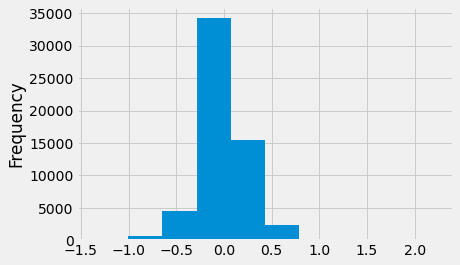

In [151]:
df_test.COL_13.plot.hist()

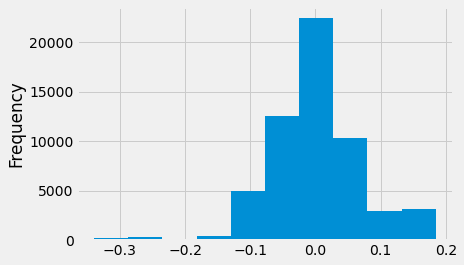

In [152]:
df_test.COL_15.plot.hist()

# Modeling

In [157]:
import re
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test  = df_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# df_train = df_train.drop(columns=['COL_17_month_year','COL_18_month_year'])
# df_test = df_test.drop(columns=['COL_17_month_year','COL_18_month_year'])



f2_train = df_train
X = f2_train.drop(columns=['label'])
y = f2_train['label']

In [158]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

### Turning random_sate

In [175]:
gini_score = []
random = []
for i in range(50,150):
    train = df_train.drop(columns=['msisdn', 'label'])
    y = df_train['label'].values
    x = train.values
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.3, random_state=i, stratify=y)
    lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                        objective = 'binary', 
                                  num_leaves=32,
                                  learning_rate=0.05,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 1
                                  )
    lgb_classifier

    model = lgb_classifier.fit(x, y, eval_metric = 'auc',
              eval_set = [(x_test, y_test), (x, y)],
              eval_names = ['valid', 'train'], 
              early_stopping_rounds = 100, verbose = 200)

    valid_score = lgb_classifier.best_score_['valid']['auc'] 
    train_score = lgb_classifier.best_score_['train']['auc'] 


    # valid_scores.append(valid_score)
    # train_scores.append(train_score)
    # print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))
    print(f'gini_train: {2*train_score-1}, gini_valid: {2*valid_score-1}')
    gini_score.append((2*train_score-1,2*valid_score-1))
    random.append(i)

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.843336	train's binary_logloss: 0.239177	valid's auc: 0.752493	valid's binary_logloss: 0.268156
gini_train: 0.686672775861114, gini_valid: 0.5049866312150957
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.838306	train's binary_logloss: 0.240385	valid's auc: 0.757614	valid's binary_logloss: 0.267198
gini_train: 0.6766118137050328, gini_valid: 0.5152279779713826
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.844832	train's binary_logloss: 0.239347	valid's auc: 0.75073	valid's binary_logloss: 0.26833
gini_train: 0.6896633270833825, gini_valid: 0.5014603708544962
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.84382

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.839622	train's binary_logloss: 0.240872	valid's auc: 0.763245	valid's binary_logloss: 0.266134
gini_train: 0.679244039285301, gini_valid: 0.5264894305744003
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.838386	train's binary_logloss: 0.2413	valid's auc: 0.764214	valid's binary_logloss: 0.264682
gini_train: 0.6767712523464735, gini_valid: 0.5284273291229151
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.843548	train's binary_logloss: 0.239605	valid's auc: 0.756678	valid's binary_logloss: 0.266872
gini_train: 0.6870963393641063, gini_valid: 0.5133551696921235
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.84121

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.842048	train's binary_logloss: 0.239998	valid's auc: 0.75279	valid's binary_logloss: 0.266828
gini_train: 0.6840957487355228, gini_valid: 0.5055799280240958
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.840741	train's binary_logloss: 0.24002	valid's auc: 0.759361	valid's binary_logloss: 0.267769
gini_train: 0.6814811451284659, gini_valid: 0.5187212353758885
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.841699	train's binary_logloss: 0.24074	valid's auc: 0.763765	valid's binary_logloss: 0.264593
gini_train: 0.6833989422794462, gini_valid: 0.5275295611339355
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.83984

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.839763	train's binary_logloss: 0.240715	valid's auc: 0.758894	valid's binary_logloss: 0.266512
gini_train: 0.6795253035266065, gini_valid: 0.5177887923872013
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.841018	train's binary_logloss: 0.240657	valid's auc: 0.758908	valid's binary_logloss: 0.265565
gini_train: 0.6820365297655053, gini_valid: 0.5178165403490798
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.840381	train's binary_logloss: 0.24021	valid's auc: 0.756467	valid's binary_logloss: 0.26707
gini_train: 0.6807621539974003, gini_valid: 0.5129334564063595
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.8414

In [179]:
for i,j in enumerate(gini_score):
    a , b = j
    print(" random_state: {} - train: {} - valid: {}".format(random[i], a, b) )

 random_state: 50 - train: 0.686672775861114 - valid: 0.5049866312150957
 random_state: 51 - train: 0.6766118137050328 - valid: 0.5152279779713826
 random_state: 52 - train: 0.6896633270833825 - valid: 0.5014603708544962
 random_state: 53 - train: 0.6876446020916405 - valid: 0.48683034752789545
 random_state: 54 - train: 0.6739150083457592 - valid: 0.5272088074340016
 random_state: 55 - train: 0.6874108659938509 - valid: 0.49442441132718784
 random_state: 56 - train: 0.6764207359440542 - valid: 0.5226420184082448
 random_state: 57 - train: 0.6831978178001306 - valid: 0.5308493241082175
 random_state: 58 - train: 0.6810084082769896 - valid: 0.517662791957725
 random_state: 59 - train: 0.6825583156610899 - valid: 0.5095195812629518
 random_state: 60 - train: 0.688719323096868 - valid: 0.5064496693772618
 random_state: 61 - train: 0.6813552686683693 - valid: 0.5241929582918274
 random_state: 62 - train: 0.6815954905297432 - valid: 0.5231947084437645
 random_state: 63 - train: 0.6857316528

In [ ]:
random_state: 57 - train: 0.6324749683127577 - valid: 0.5225649171015267
random_state: 79 - train: 0.6296455810410679 - valid: 0.5283536839718184
random_state: 92 - train: 0.6405437489379857 - valid: 0.5111502529538978
            
random_state: 133 - train: 0.635867462047371 - valid: 0.5241715806308154
random_state: 157 - train: 0.6334281535275756 - valid: 0.5272747904694106
random_state: 159 - train: 0.6372866694928656 - valid: 0.5220210034155146
random_state: 173 - train: 0.6347638032398624 - valid: 0.5247928540148832
random_state: 181 - train: 0.633214327347408 - valid: 0.5234492806309363
random_state: 197 - train: 0.6318041873343079 - valid: 0.5231769879281702
random_state: 227 - train: 0.632070765865399 - valid: 0.5220858243491968
random_state: 243 - train: 0.6260123872871373 - valid: 0.5233689205856911

            
            

### Turning learning rate

In [180]:
learning_rate = np.arange(0.01, 0.5, 0.01)
learning_rate

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49])

In [181]:
gini_score_lr = []
lr_optimizer = []
for lr in learning_rate:
    train = df_train.drop(columns=['msisdn', 'label'])
    y = df_train['label'].values
    x = train.values
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state= 57, stratify=y)
    lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                        objective = 'binary', 
                                  num_leaves=32,
                                  learning_rate= lr,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 1
                                       )
    lgb_classifier

    model = lgb_classifier.fit(x, y, eval_metric = 'auc',
              eval_set = [(x_test, y_test), (x, y)],
              eval_names = ['valid', 'train'], 
              early_stopping_rounds = 100, verbose = 200)

    valid_score = lgb_classifier.best_score_['valid']['auc'] 
    train_score = lgb_classifier.best_score_['train']['auc'] 


    # valid_scores.append(valid_score)
    # train_scores.append(train_score)
    # print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))
    print(f'gini_train: {2*train_score-1}, gini_valid: {2*valid_score-1}')
    gini_score_lr.append((2*train_score-1,2*valid_score-1))
    lr_optimizer.append(lr)

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[99]	train's auc: 0.774303	train's binary_logloss: 0.27841	valid's auc: 0.740002	valid's binary_logloss: 0.286583
gini_train: 0.5486063987427319, gini_valid: 0.4800034942479303
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[99]	train's auc: 0.7933	train's binary_logloss: 0.264448	valid's auc: 0.748407	valid's binary_logloss: 0.27778
gini_train: 0.5865998503740548, gini_valid: 0.49681351467584123
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.808497	train's binary_logloss: 0.255161	valid's auc: 0.753443	valid's binary_logloss: 0.272846
gini_train: 0.616994151529286, gini_valid: 0.5068864459018743
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.821851	t

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.930407	train's binary_logloss: 0.174449	valid's auc: 0.73014	valid's binary_logloss: 0.285081
gini_train: 0.860814440115105, gini_valid: 0.46028079417983725
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.929738	train's binary_logloss: 0.173771	valid's auc: 0.735815	valid's binary_logloss: 0.281809
gini_train: 0.8594754880874151, gini_valid: 0.4716292154965416
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.935311	train's binary_logloss: 0.170102	valid's auc: 0.727355	valid's binary_logloss: 0.288557
gini_train: 0.8706225056884482, gini_valid: 0.4547100670178834
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.935

In [183]:
for i,j in enumerate(gini_score_lr):
    a , b = j
    print(" learing_rate: {} - Gini_train: {} - Gini_valid: {}".format(lr_optimizer[i], a, b) )

 learing_rate: 0.01 - Gini_train: 0.5486063987427319 - Gini_valid: 0.4800034942479303
 learing_rate: 0.02 - Gini_train: 0.5865998503740548 - Gini_valid: 0.49681351467584123
 learing_rate: 0.03 - Gini_train: 0.616994151529286 - Gini_valid: 0.5068864459018743
 learing_rate: 0.04 - Gini_train: 0.6437026357762752 - Gini_valid: 0.5127585743468444
 learing_rate: 0.05 - Gini_train: 0.6641125869518034 - Gini_valid: 0.5155528079417984
 learing_rate: 0.060000000000000005 - Gini_train: 0.6852947613431242 - Gini_valid: 0.5203786331218865
 learing_rate: 0.06999999999999999 - Gini_train: 0.7015227902804801 - Gini_valid: 0.520420384904849
 learing_rate: 0.08 - Gini_train: 0.7216639232705648 - Gini_valid: 0.5251001684406695
 learing_rate: 0.09 - Gini_train: 0.7333919444044068 - Gini_valid: 0.5211518474715979
 learing_rate: 0.09999999999999999 - Gini_train: 0.7455047896222982 - Gini_valid: 0.5158596745869619
 learing_rate: 0.11 - Gini_train: 0.7606743396071869 - Gini_valid: 0.5148908719492529
 learing_

In [135]:
(68, 0.2, 0.29)  train:0.7892085102773625   valid: 0.4606427624269791  đã submit
(79, 0.4, 0.29)  train:0.8294632151685981   valid: 0.48444053533538    đã submit
(68, 0.2, 0.19)  train:0.752282785378485    valid: 0.4671624914883705  đã submit
(131, 0.2, 0.11) train:0.6864273232981559   valid: 0.5410064330000359  đã submit
(79, 0.4, 0.09)  train:0.7003788992348083   valid: 0.5369284523327005  đã submit
        
random_state: 212 size: 0.1 learing_rate: 0.11 - train: 0.6696091728946292 - valid: 0.5640347736419231                        đã submit
random_state= 226 test_size=0.1 ,learing_rate: 0.09 - train: 0.6540681799075554 - valid: 0.5638636265986852                   đã submit
random_state= 284 test_size=0.1 learing_rate: 0.09999999999999999 - train: 0.6639578102224422 - valid: 0.5620977328387493     đã submit
random_state= 284 test_size=0.1 learing_rate: 0.21000000000000002 - train: 0.7371843416548187 - valid: 0.5614510977758045     đã submit
            
            
random_state: 61 test_size: 0.2 - learing_rate: 0.13 - train: 0.7006078478452236 - valid: 0.5391017094936028
random_state: 61 test_size: 0.2 - learing_rate: 0.09999999999999999 - train: 0.6735264910942422 - valid: 0.538425796509336
random_state: 64 test_size: 0.2 - learing_rate: 0.11 - train: 0.6879743503753648 - valid: 0.5461608966777767
random_state: 90 test_size: 0.2 -  learing_rate: 0.06999999999999999 - train: 0.6394696548206784 - valid: 0.5299121958212378                    
random_state: 93 test_size: 0.2 - learing_rate: 0.09999999999999999 - train: 0.6776481068350118 - valid: 0.5453005053220084                    
random_state: 110 test_size: 0.2 -  learing_rate: 0.11 - train: 0.6872129983391837 - valid: 0.5495912625882522                    
random_state: 131 test_size: 0.2 - learing_rate: 0.06999999999999999 - train: 0.6411140802779403 - valid: 0.5456501989033438
# random_state: 157 test_size: 0.2 -  learing_rate: 0.14 - train: 0.7093472742235689 - valid: 0.5679236103644769
random_state: 180 test_size: 0.2 - learing_rate: 0.09999999999999999 - train: 0.682175051876575 - valid: 0.5453628642081496                    
random_state: 218 test_size: 0.2 - learing_rate: 0.08 - train: 0.6498835171577779 - valid: 0.5414500232949861                    
# random_state: 226 test_size: 0.2 - learing_rate: 0.12 - train: 0.6986767076210463 - valid: 0.5440475038526322 


random_state: 57 test_size: 0.2 - learing_rate: 0.08 - Gini_train: 0.7216639232705648 - Gini_valid: 0.5251001684406695 


                 
            

### Submit model

In [184]:
train = df_train.drop(columns=['msisdn', 'label'])
y = df_train['label'].values
x = train.values
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state= 57, stratify=y)
lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                    objective = 'binary', 
                                  num_leaves=20,
                                  learning_rate=0.08,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf = 6 ,min_sum_hessian_in_leaf = 1
                                 )

lgb_classifier

model = lgb_classifier.fit(x, y, eval_metric = 'auc',
          eval_set = [(x_test, y_test), (x, y)],
          eval_names = ['valid', 'train'], 
          early_stopping_rounds = 100, verbose = 200)

valid_score = lgb_classifier.best_score_['valid']['auc'] 
train_score = lgb_classifier.best_score_['train']['auc'] 


# valid_scores.append(valid_score)
# train_scores.append(train_score)
# print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))
print(f'gini_train: {2*train_score-1}, gini_valid: {2*valid_score-1}')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.826418	train's binary_logloss: 0.242089	valid's auc: 0.76041	valid's binary_logloss: 0.266928
gini_train: 0.6528352159581661, gini_valid: 0.520820521090922


In [185]:
msisdn = df_test['msisdn'].values
submission =df_test.drop(columns=['msisdn','Label'])


X_predict = submission.values

y_predict = model.predict_proba(X_predict)[:,1]
output = pd.DataFrame({'msisdn': msisdn, 'label': y_predict})
print(output)

                     msisdn     label
0      0001000cf619c9b3085d  0.066337
1      000100248d878d4558b2  0.057142
2      000100362c217ed2e556  0.048011
3      000100645e3a4bd29c68  0.044357
4      00010073f9bc66ef77d3  0.068719
...                     ...       ...
57408  0001e5796e2195248577  0.098864
57409  0001e646841a1a424e9a  0.045678
57410  0001ead2f3d27418edf0  0.053432
57411  0001ede64d1753c7cceb  0.032189
57412  0001fb7f7d700fc35644  0.059008

[57413 rows x 2 columns]


In [186]:
output.to_csv('Light_GBM_version6_nonkFold_add_newfeature.csv', index=False,index_label=False)

In [187]:
output

,msisdn,label
0,0001000cf619c9b3085d,0.066337
1,000100248d878d4558b2,0.057142
2,000100362c217ed2e556,0.048011
3,000100645e3a4bd29c68,0.044357
4,00010073f9bc66ef77d3,0.068719
...,...,...
57408,0001e5796e2195248577,0.098864
57409,0001e646841a1a424e9a,0.045678
57410,0001ead2f3d27418edf0,0.053432
57411,0001ede64d1753c7cceb,0.032189


In [188]:
test_submission

,msisdn,label,Label
0,0001000cf619c9b3085d,0.531734,0.0
1,000100248d878d4558b2,0.529381,0.0
2,000100362c217ed2e556,0.775374,1.0
3,000100645e3a4bd29c68,0.886796,1.0
4,00010073f9bc66ef77d3,0.346241,0.0
...,...,...,...
57408,0001e5796e2195248577,0.562003,0.0
57409,0001e646841a1a424e9a,0.919900,1.0
57410,0001ead2f3d27418edf0,0.627617,0.0
57411,0001ede64d1753c7cceb,0.600909,0.0


### Train model with K-Fold 

In [192]:
f2_train = df_train
X = f2_train.drop(columns=['label'])
y = f2_train['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=226)

f2_train = pd.concat([X_train,y_train], axis = 1)
f2_test = pd.concat([X_test,y_test], axis = 1)
f2_train.shape, f2_test.shape

gini, feature_importance_df = {}, pd.DataFrame()

TRAIN, TEST = f2_train.drop(['msisdn','label'], axis=1), f2_test.drop(['msisdn','label'], axis=1)
LABEL = f2_train['label']
preds, oof_preds = np.zeros(TRAIN.shape[0]), {}

cv = StratifiedKFold(n_splits= 3, shuffle=True)
for i, (train_idx, val_idx) in enumerate(cv.split(TRAIN, LABEL)):
    X_train, y_train = TRAIN.iloc[train_idx], LABEL.iloc[train_idx]
    X_val, y_val = TRAIN.iloc[val_idx], LABEL.iloc[val_idx]

    
    lgb_classifier = LGBMClassifier(n_estimator = 10000, 
                                    objective = 'binary', 
                                    num_leaves=20,
                                    learning_rate=  0.08,
                                    max_bin = 55, bagging_fraction = 0.8,
                                    bagging_freq = 5, feature_fraction = 0.2319,
                                    feature_fraction_seed=9, bagging_seed=9,
                                    min_data_in_leaf =6, 
                                    min_sum_hessian_in_leaf = 1
                                   )
    
    gbm = lgb_classifier.fit(X_train, y_train, eval_set=(X_val, y_val), 
                             early_stopping_rounds = 1000,
                             verbose = 200)

    y_pred = gbm.predict(X_val)
    y_pred_proba = gbm.predict_proba(X_val)[:, 1]

    preds[val_idx] = y_pred_proba
    oof_preds[f'Fold_{i+1}'] = gbm.predict_proba(TEST)[:, 1]

    gini[f'Fold_{i+1}'] = 2 * roc_auc_score(y_val, y_pred_proba) - 1

    # For create feature importances
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = TRAIN.columns
    fold_importance_df["importance"] = gbm.feature_importances_
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d gini_train : %.5f' % (i + 1, 2*roc_auc_score(y_val, y_pred_proba) - 1))

    roc_auc = roc_auc_score(LABEL, preds)
    print('Avg gini_valid:', 2*roc_auc - 1)

    result = np.array(list(gini.values()))
    print('GINI: {:.5f} +- {:.5f}'.format(result.mean(), result.std()))

Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.266839
Fold  1 gini_train : 0.50741
Avg gini_valid: 0.05626676465793423
GINI: 0.50741 +- 0.00000
Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.26408
Fold  2 gini_train : 0.52192
Avg gini_valid: 0.22848249821545008
GINI: 0.51467 +- 0.00725
Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.267117
Fold  3 gini_train : 0.50431
Avg gini_valid: 0.5111622962437987
GINI: 0.51121 +- 0.00768


In [193]:
pd.DataFrame(oof_preds)

,Fold_1,Fold_2,Fold_3
0,0.061440,0.077556,0.065427
1,0.131673,0.103474,0.183914
2,0.019784,0.024562,0.027815
3,0.080207,0.142844,0.085571
4,0.056068,0.043941,0.050963
...,...,...,...
17312,0.055566,0.059035,0.054485
17313,0.101367,0.094271,0.065717
17314,0.111061,0.073608,0.066419
17315,0.021993,0.027202,0.032514


In [117]:
gini

{'F_1': 0.5017999593577791,
 'F_2': 0.5019276675384481,
 'F_3': 0.5123286587103106}

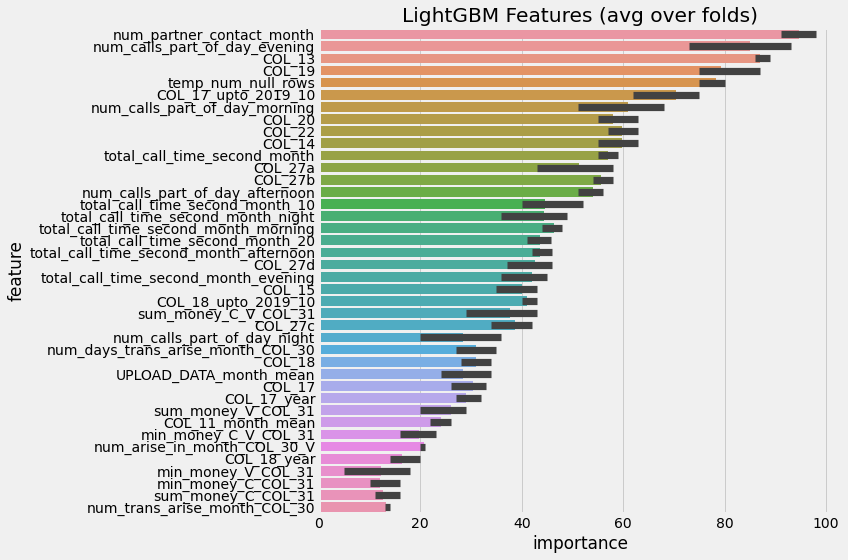

In [194]:
def display_importances(feature_importance_df_):

    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:40].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

display_importances(feature_importance_df_=feature_importance_df)


## Predict 

In [195]:
test_data = df_test
test_data.shape

(57413, 64)

In [196]:
data = gbm.predict_proba(test_data.drop(columns = ['msisdn','Label']))[:,1]
submission = pd.DataFrame({'label': data})
submission = pd.concat([test_data['msisdn'],submission['label']], axis = 1)
submission.to_csv('Light_GBM_submission_kfold5_add_newfeature.csv', index=False,index_label=False)

In [197]:
submission

,msisdn,label
0,0001000cf619c9b3085d,0.064437
1,000100248d878d4558b2,0.064818
2,000100362c217ed2e556,0.041633
3,000100645e3a4bd29c68,0.032963
4,00010073f9bc66ef77d3,0.076852
...,...,...
57408,0001e5796e2195248577,0.067180
57409,0001e646841a1a424e9a,0.070786
57410,0001ead2f3d27418edf0,0.045741
57411,0001ede64d1753c7cceb,0.026890


In [198]:
test_submission

,msisdn,label,Label
0,0001000cf619c9b3085d,0.531734,0.0
1,000100248d878d4558b2,0.529381,0.0
2,000100362c217ed2e556,0.775374,1.0
3,000100645e3a4bd29c68,0.886796,1.0
4,00010073f9bc66ef77d3,0.346241,0.0
...,...,...,...
57408,0001e5796e2195248577,0.562003,0.0
57409,0001e646841a1a424e9a,0.919900,1.0
57410,0001ead2f3d27418edf0,0.627617,0.0
57411,0001ede64d1753c7cceb,0.600909,0.0
